In [1]:
# widen jupyter notebook window
from IPython.display import display, HTML
display(HTML("<style>.container {width:95% !important; }</style>"))

# check environment
import os
print(f'Conda Environment: ' + os.environ['CONDA_DEFAULT_ENV'])

from platform import python_version
print(f'python version: {python_version()}')

Conda Environment: ROICaT
python version: 3.9.13


In [2]:
import pprint
from pathlib import Path

import natsort
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
%load_ext autoreload
%autoreload 2
import bnpm
import bnpm.misc
import bnpm.server
import bnpm.h5_handling

In [4]:
%load_ext autoreload
%autoreload 2
import bnpm.file_helpers
import bnpm.plotting_helpers

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Get logger file from server

input credentials for server

In [7]:
import getpass

remote_host_transfer = "transfer.rc.hms.harvard.edu"
remote_host_compute = "o2.hms.harvard.edu"
username = input('Username: ')
pw = bnpm.server.pw_encode(getpass.getpass(prompt='Password: '))

Username: rh183
Password: ········


prepare sftp client

In [8]:
ssh_t = bnpm.server.ssh_interface()

ssh_t.o2_connect(
    hostname=remote_host_transfer,
    username=username,
    password=bnpm.server.pw_decode(pw),
    skip_passcode=False,
    key_filename=None,
    look_for_keys=False,
    passcode_method=1,
    verbose=1,
)

sftp_t = bnpm.server.sftp_interface(ssh_t.client)

Duo two-factor login for rh183

Enter a passcode or select one of the following options:

 1. Duo Push to XXX-XXX-4151
 2. Phone call to XXX-XXX-4151
 3. SMS passcodes to XXX-XXX-4151

Passcode or option (1-3): 
1



Pushed a login request to your device...

Success. Logging you in...

Welcome to O2 (Orchestra 2)!

   ___    ____
  / _ \  |___ \
 | | | |   __) |
 | |_| |  / __/
  \___/  |_____|


You've landed on transfer05 which is a
4 core system with 7.62 GiB memory
running kernel 3.10.0 born on 2020-07-28

==== O2 ===================================================================

  News (Sep 8 2022)
  

  +-------------------------------------------------------------------------------+
  | ###################### Try out the new O2 Portal! ########################### |
  |                                                                               |
  | * Access O2 via the web! Just point your web browser to                       |
  |   o2portal.rc.hms.harvard.edu and login wit

### find files
Search for logger files and associated expParams files

In [10]:
paths_logger = sftp_t.search_recursive(
    path=r'/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/cage_g8test/',
    search_pattern_re='logger.mat',
    max_depth=12,
    find_files=True,
    find_folders=False,
    verbose=True,
)

paths_logger = natsort.natsorted(paths_logger)
display(paths_logger)

/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/cage_g8test/mouse_g8test/20230317/analysis_data/logger.mat
/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/cage_g8test/mouse_g8test/20230314/analysis_data/logger.mat
/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/cage_g8test/mouse_g8test/20230319/analysis_data/logger.mat
/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/cage_g8test/mouse_g8test/20230313_badDay0/analysis_data/logger.mat
/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/cage_g8test/mouse_g8test/20230315/analysis_data/logger.mat
/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/cage_g8test/mouse_g8test/20230316/analysis_data/logger.mat
/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/cage_g8test/mouse_g8test/20230318/analysis_data/logger.mat


['/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/cage_g8test/mouse_g8test/20230313_badDay0/analysis_data/logger.mat',
 '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/cage_g8test/mouse_g8test/20230314/analysis_data/logger.mat',
 '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/cage_g8test/mouse_g8test/20230315/analysis_data/logger.mat',
 '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/cage_g8test/mouse_g8test/20230316/analysis_data/logger.mat',
 '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/cage_g8test/mouse_g8test/20230317/analysis_data/logger.mat',
 '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/cage_g8test/mouse_g8test/20230318/analysis_data/logger.mat',
 '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/cage_g8test/mouse_g8test/20230319/analysis_data/logger.mat']

### WARNING:

This script/notebook is meant to run on data collected starting with `round 5 experiments` as that is the first time I started using 'trials'

mouse 2_6

In [6]:
paths_logger = [
    '/n/files/Neurobio/MICROSCOPE/Rich/data/res2p/old_data/scanimage data/round 5 experiments/mouse 2_6/20210410/logger.mat',
    '/n/files/Neurobio/MICROSCOPE/Rich/data/res2p/old_data/scanimage data/round 5 experiments/mouse 2_6/20210411/logger.mat',
    '/n/files/Neurobio/MICROSCOPE/Rich/data/res2p/old_data/scanimage data/round 5 experiments/mouse 2_6/20210412/logger.mat',
    '/n/files/Neurobio/MICROSCOPE/Rich/data/res2p/old_data/scanimage data/round 5 experiments/mouse 2_6/20210413/logger.mat',
    '/n/files/Neurobio/MICROSCOPE/Rich/data/res2p/old_data/scanimage data/round 5 experiments/mouse 2_6/20210414/logger.mat',
    '/n/files/Neurobio/MICROSCOPE/Rich/data/res2p/old_data/scanimage data/round 5 experiments/mouse 2_6/20210415/logger.mat',
    '/n/files/Neurobio/MICROSCOPE/Rich/data/res2p/old_data/scanimage data/round 5 experiments/mouse 2_6/20210416/logger.mat',
    '/n/files/Neurobio/MICROSCOPE/Rich/data/res2p/old_data/scanimage data/round 5 experiments/mouse 2_6/20210417/logger.mat',
]

mouse B

In [74]:
paths_logger = [
    '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/mouse_B/20221020/analysis_data/logger.mat',
    '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/mouse_B/20221021/analysis_data/logger.mat',
    '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/mouse_B/20221022/analysis_data/logger.mat',
    '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/mouse_B/20221023/analysis_data/logger.mat',
    '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/mouse_B/20221024/analysis_data/logger.mat',
    '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/mouse_B/20221025/analysis_data/logger.mat',
    '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/mouse_B/20221026/analysis_data/logger.mat',
    '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/mouse_B/20221027/analysis_data/logger.mat',
    '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/mouse_B/20221028/analysis_data/logger.mat',
    '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/mouse_B/20221029/analysis_data/logger.mat',
    '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/mouse_B/20221030/analysis_data/logger.mat',
    '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/mouse_B/20221031/analysis_data/logger.mat',
    '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/mouse_B/20221101/analysis_data/logger.mat',
    '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/mouse_B/20221102/analysis_data/logger.mat',
    '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/mouse_B/20221103/analysis_data/logger.mat',
    '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/mouse_B/20221104/analysis_data/logger.mat',
    '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/mouse_B/20221105/analysis_data/logger.mat',
    '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/mouse_B/20221106/analysis_data/logger.mat',
]

mouse g1

In [578]:
paths_logger = [
    '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/mouse_g1/20221010/analysis_data/logger.mat',
    '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/mouse_g1/20221011/analysis_data/logger.mat',
    '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/mouse_g1/20221013/analysis_data/logger.mat',
    '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/mouse_g1/20221014/analysis_data/logger.mat',
    '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/mouse_g1/20221015/analysis_data/logger.mat',
    '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/mouse_g1/20221016/analysis_data/logger.mat',
]

mouse g2FB

In [555]:
paths_logger = [
    '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/BMI_cage_g2F/mouse_g2FB/20221111/analysis_data/logger.mat',
    '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/BMI_cage_g2F/mouse_g2FB/20221112/analysis_data/logger.mat',
    '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/BMI_cage_g2F/mouse_g2FB/20221113/analysis_data/logger.mat',
    '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/BMI_cage_g2F/mouse_g2FB/20221114/analysis_data/logger.mat',
    '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/BMI_cage_g2F/mouse_g2FB/20221115/analysis_data/logger.mat',
    '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/BMI_cage_g2F/mouse_g2FB/20221116/analysis_data/logger.mat',
    '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/BMI_cage_g2F/mouse_g2FB/20221117/analysis_data/logger.mat',
    '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/BMI_cage_g2F/mouse_g2FB/20221118/analysis_data/logger.mat',
]

mouse g8t

In [9]:
paths_logger = [
 '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/cage_g8test/mouse_g8test/20230314/analysis_data/logger.mat',
 '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/cage_g8test/mouse_g8test/20230315/analysis_data/logger.mat',
 '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/cage_g8test/mouse_g8test/20230316/analysis_data/logger.mat',
 '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/cage_g8test/mouse_g8test/20230317/analysis_data/logger.mat',
 '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/cage_g8test/mouse_g8test/20230318/analysis_data/logger.mat',
 '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/cage_g8test/mouse_g8test/20230319/analysis_data/logger.mat',
 '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/cage_g8test/mouse_g8test/20230320/analysis_data/logger.mat',
 '/n/files/Neurobio/MICROSCOPE/Gyu/BMI_data/cage_g8test/mouse_g8test/20230321/analysis_data/logger.mat',
]

In [10]:
dirs_logger = [str(Path(p).resolve().parent) for p in paths_logger]

paths_expParams = [str(Path(d).resolve() / 'expParams.mat') for d in dirs_logger]
# paths_loggerAlignmentVectors = [str(Path(d).resolve() / 'logger_alignment_vectors.mat') for d in dirs_logger]
# paths_loggerAligned = [str(Path(d).resolve() / 'logger_aligned.mat') for d in dirs_logger]

assert all([sftp_t.exists(p) for p in paths_expParams])
# assert all([sftp_t.exists(p) for p in paths_loggerAlignmentVectors])
# assert all([sftp_t.exists(p) for p in paths_loggerAligned])

### get logger and expParams files
Pull them into a temp directory structure

make a directory structure based on the naming of the directories in remote.\
Might need to add or remove `.parent` suffices to `Path(p).resolve().parent`

In [11]:
dir_save_outer = r'/media/rich/bigSSD/downloads_tmp/loggers'
folderNames_session = [str(Path(p).resolve().parent.parent.name) for p in paths_logger]
dirs_save_session = [str(Path(dir_save_outer).resolve() / n) for n in folderNames_session]

check to make sure these are the dated session folder names

In [12]:
display(folderNames_session)

['20230314',
 '20230315',
 '20230316',
 '20230317',
 '20230318',
 '20230319',
 '20230320',
 '20230321']

In [13]:
## Make directories
[Path(d).mkdir(parents=True, exist_ok=True) for d in dirs_save_session];

## Enumerate paths for each session
paths_transfer = {folderName: {
    'path_logger_remote': paths_logger[i_folder], 
    'path_logger_local': str(Path(dirs_save_session[i_folder]) / 'logger.mat'),
    'path_expParams_remote': paths_expParams[i_folder],
    'path_expParams_local': str(Path(dirs_save_session[i_folder]) / 'expParams.mat'),
#     'path_loggerAlignmentVectors_remote': paths_loggerAlignmentVectors[i_folder],
#     'path_loggerAlignmentVectors_local': str(Path(dirs_save_session[i_folder]) / 'logger_alignment_vectors.mat'),
#     'path_loggerAligned_remote': paths_loggerAligned[i_folder],
#     'path_loggerAligned_local': str(Path(dirs_save_session[i_folder]) / 'logger_aligned.mat'),
} for i_folder, folderName in enumerate(folderNames_session)}

In [14]:
for folderName, paths in tqdm(list(paths_transfer.items())[:]):
    sftp_t.sftp.get(remotepath=paths['path_logger_remote'], localpath=paths['path_logger_local'])
    sftp_t.sftp.get(remotepath=paths['path_expParams_remote'], localpath=paths['path_expParams_local'])
#     sftp_t.sftp.get(remotepath=paths['path_loggerAlignmentVectors_remote'], localpath=paths['path_loggerAlignmentVectors_local'])
#     sftp_t.sftp.get(remotepath=paths['path_loggerAligned_remote'], localpath=paths['path_loggerAligned_local'])

100%|█████████████████████████████████████████████| 8/8 [00:13<00:00,  1.71s/it]


# Import logger and expParams

In [15]:
import scipy.io
import pandas as pd
import numpy as np
import matplotlib as mpl

make lists of logger dicts and expParams dicts

In [16]:
logger_objs    = [scipy.io.loadmat(file_name=p, simplify_cells=True)['logger']    for p in [pt['path_logger_local']    for folderName,pt in tqdm(paths_transfer.items())]]
expParams_objs = [bnpm.file_helpers.matlab_load(filename=p, simplify_cells=True)['expParams'] for p in [pt['path_expParams_local'] for folderName,pt in tqdm(paths_transfer.items())]]
# loggerAlignmentVectors_objs = [scipy.io.loadmat(file_name=p, simplify_cells=True)['logger_alignment_vectors'] for p in [pt['path_loggerAlignmentVectors_local'] for folderName,pt in paths_transfer.items()]]
# loggerAligned_objs = [scipy.io.loadmat(file_name=p, simplify_cells=True)['logger_aligned'] for p in [pt['path_loggerAligned_local'] for folderName,pt in paths_transfer.items()]]

100%|██████████████████████████████████████████| 8/8 [00:00<00:00, 65922.26it/s]


make dataframes for each logger using the loggerNames field from expParams

### WARNING:

in the line:
```
...
            data=logger[key_outer][:, :len(expParams['loggerNames'][key_outer])], 
...            
```
the indexing: `[:, :len(expParams['loggerNames'][key_outer])]` is used because the length of the logger is sometimes too long. This should be fine for most experiments, but just a heads up that if the `expParams['loggerNames']` and actual logger data doesn't match up then this is screwed.

In [17]:
logger_dfs = {
    folderName: {
        key_outer: pd.DataFrame(
            data=logger[key_outer][:, :len(expParams['loggerNames'][key_outer])], 
            columns=expParams['loggerNames'][key_outer],
        ) for key_outer in expParams['loggerNames'].keys()
    } for (folderName, logger, expParams) in zip(folderNames_session, logger_objs, expParams_objs)
}

In [18]:
# loggerAligned_dfs = {
#     folderName: {
#         key_outer: pd.DataFrame(
#             data=logger[key_outer], 
#             columns=expParams['loggerNames'][key_outer]
#         ) for key_outer in logger.keys()
#     } for (folderName, logger, expParams) in zip(folderNames_session, loggerAligned_objs, expParams_objs)
# }

In [19]:
# bnpm.h5_handling.show_item_tree(logger_dfs)

Determine the duration of each trial.\
Note that the `'trial_now_'` fields appear to be busted. So it is safter to use the `'counter_frameNum_'` fields and just make sure to correct them using the alignment vectors.

To align raw logger indices to scanimage/suite2p indices, use the `logger_alignment_vectors` file and the `inds_align_movie_to_logger` field within it. You can use the `bnpm.indexing.index_with_nans` function to reindex a raw logger time series as such: 
```
ts_SI = bnpm.indexing.index_with_nans(
    values=ts_logger,
    indices=logger_alignment_vectors['inds_align_movie_to_logger']-1
)
```

To convert index values from logger indices to scanimage/suite2p indices, use the `inds_align_logger2movie` field. You can also use it with the `index_with_nans` function as such:
```
frame_start_SI = bnpm.indexing.index_with_nans(
        values=logger_alignment_vectors['inds_align_logger2movie'],
        indices=frame_start_logger,
    )

Also note that loggers BEFORE 2022.12.13 have a bug that appears in failure trials that occur after failure trials. Their duration will appear negative. This is because the update trial info happens after iterating the trial number instead of before:
```
trialNum = trialNum + 1
updateLoggerTrials_END(0)
```

### Extract trial statistics

In [20]:
Fs = 30

n_sessions = len(logger_dfs)

trials_duration_frame = []
trials_duration_nowTime = []
trials_success = []
trials_type_111 = []

for logger_df in logger_dfs.values():
    ## pull out frames of start and end. -1 to account for matlab 1-indexing
    frame_start__idx_logger = logger_df['trials']['frameNum_trialStart'].to_numpy() - 1
    frame_end__idx_logger = logger_df['trials']['frameNum_trialEnd'].to_numpy() - 1   
#     frame_start__idx_SI = bnpm.indexing.index_with_nans(
#         values=align['inds_align_logger2movie'],
#         indices=frame_start__idx_logger,
#     )
#     frame_end__idx_SI = bnpm.indexing.index_with_nans(
#         values=align['inds_align_logger2movie'],
#         indices=frame_end__idx_logger,
#     )
#     trials_duration_frame.append((frame_end__idx_SI - frame_start__idx_SI))
    
    ## pull out durations using time
    time_start__idx_logger = logger_df['trials']['time_now_trialStart'].to_numpy()
    time_end__idx_logger = logger_df['trials']['time_now_trialEnd'].to_numpy()
    trials_duration_nowTime.append((time_end__idx_logger - time_start__idx_logger))

    ## pull out whether the outcome was a success
    trials_success.append(logger_df['trials']['success_outcome'] == 1)
    
    ## pull out whether the trial type was a standard trial with feedback, reward, and cursor all one (1 1 1)
    trials_type_111.append((logger_df['trials']['trialType_cursorOn'] == 1) * (logger_df['trials']['trialType_feedbackLinked'] == 1) * (logger_df['trials']['trialType_rewardOn'] == 1))
    

Plot number of successful trials over sessions

In [21]:
trials_numSuccess__111 = [np.nansum(trials_success[ii][trials_type_111[ii]]) for ii in range(n_sessions)]

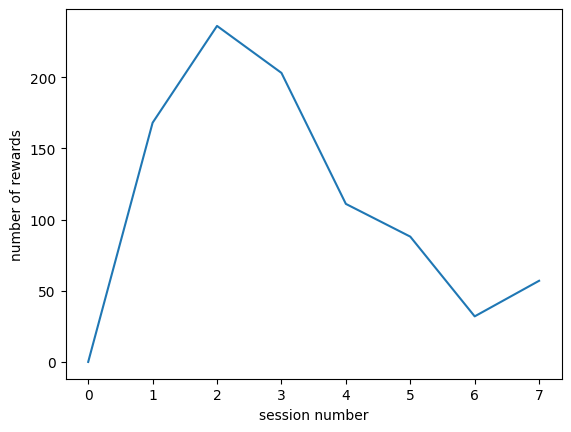

In [22]:
plt.figure()
plt.plot(trials_numSuccess__111)
plt.xlabel('session number')
plt.ylabel('number of rewards');

Plot duration of successful trials over sessions as a histogram

In [23]:
trials_duration_time__success_111 = [trials_duration_nowTime[sn][trials_success[sn] * trials_type_111[sn]] * 24*60*60 for sn in range(len(trials_duration_nowTime))]

edges = np.linspace(0,20, num=41, endpoint=True)
trials_durationHist_time__success_111 = np.array([np.histogram(t, bins=edges)[0] for t in trials_duration_time__success_111]).T

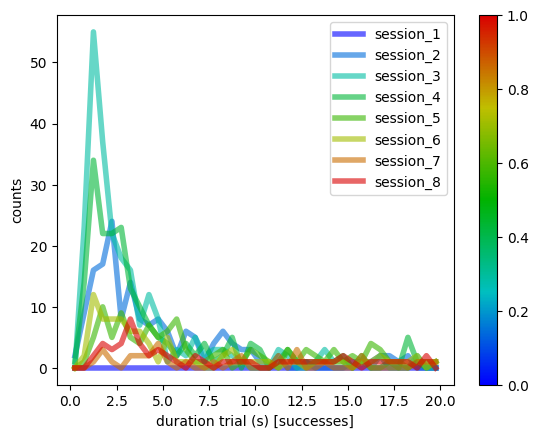

In [24]:
cmap = bnpm.plotting_helpers.simple_cmap(colors=[[0.0, 0.0, 1.0], [0.0, 0.75, 0.75], [0.0, 0.7, 0.0], [0.75, 0.75, 0], [0.85, 0.0, 0.0]])

plt.figure()
for ii,trace in enumerate(trials_durationHist_time__success_111.T):
    plt.plot(
        (edges[1:] + edges[:-1])/2, 
        trace, 
        color=cmap(ii/(n_sessions-1)), 
        linewidth=4,
        alpha=0.6,
    )
    
# [plt.stairs(t[0], t[1], color=colors[ii], linewidth=4) for ii,t in enumerate(trials_durationHist_time__success_111)];
plt.xlabel('duration trial (s) [successes]')
plt.ylabel('counts')
plt.legend([f'session_{ii}' for ii in np.arange(n_sessions)+1])
ax = plt.gca()
plt.colorbar(mpl.cm.ScalarMappable(cmap=cmap), ax=ax);

Text(0, 0.5, 'successes (within 2.5 sec)')

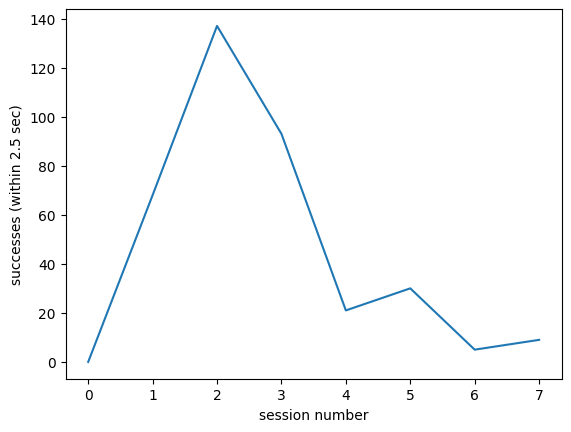

In [25]:
plt.figure()
plt.plot(trials_durationHist_time__success_111[:5,:].sum(0))
plt.xlabel('session number')
plt.ylabel('successes (within 2.5 sec)')

### NOTE:

In earlier experiments use `CE_ITI_successful` and in later experiments use `CE_ITI_withZ`

<IPython.core.display.Javascript object>


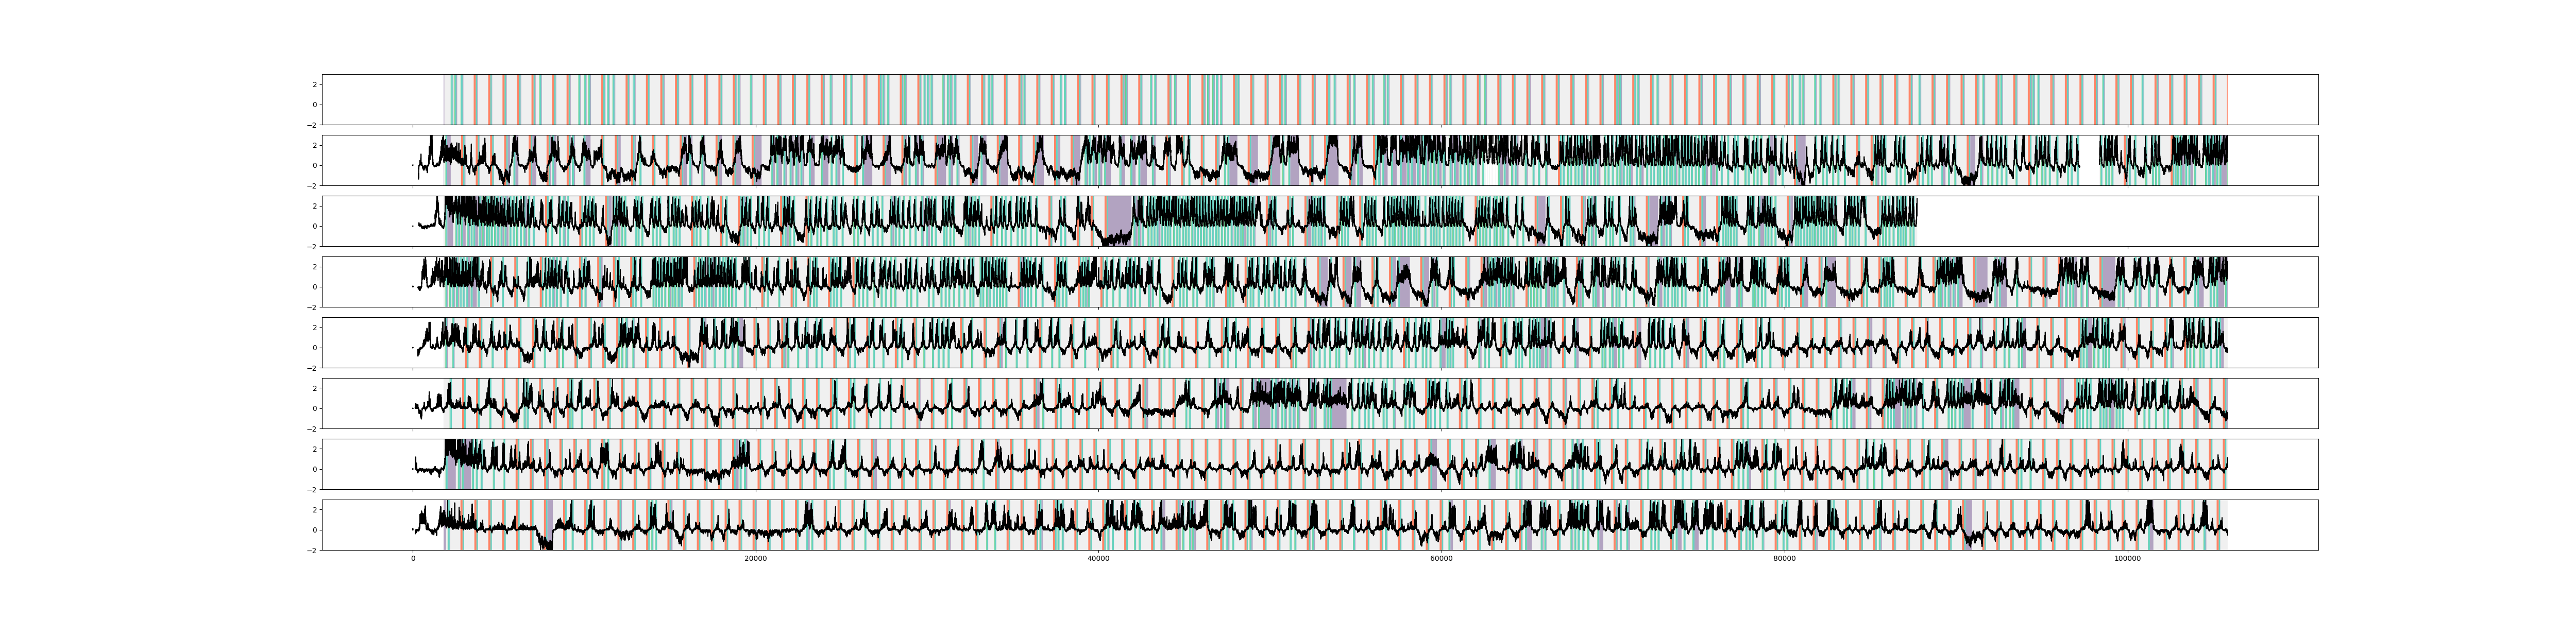

In [26]:
%matplotlib notebook

fig, axs = plt.subplots(n_sessions, 1, sharex=True, sharey=True, figsize=(50, n_sessions*1.5))

for i_sesh in range(n_sessions):

    names_states = expParams_objs[i_sesh]['loggerNames']['timeSeries']

    names_toPlot = [
        'CE_trial',
        'CE_rewardToneHold',
        'CE_rewardDelivery',
        'CE_ITI_withZ',
        'CE_waitForBaseline',
        'CE_timeout'
    ]
    idx_toPlot = np.isin(names_states, names_toPlot)

    n_samples = logger_objs[i_sesh]['timeSeries'].shape[0]

    colors = {
        'CE_trial': (0.9, 0.9, 0.9),
        'CE_rewardToneHold': (0.0, 0.7, 0.0),
        'CE_rewardDelivery': (0.0, 0.7, 0.2),
        'CE_ITI_withZ': (0.0, 0.7, 0.6),
        'CE_waitForBaseline': (0.5, 0.4, 0.6),
        'CE_timeout': (1.0, 0.2, 0.0),
    }

    assert all([n_c == n_tp for n_c, n_tp in zip(list(colors.keys()), names_toPlot)])

    for name in names_toPlot:
        axs[i_sesh].fill_between(
            x=np.arange(n_samples),
            y1=logger_objs[i_sesh]['timeSeries'][:, np.isin(names_states, name)][:,0] * 10 - 5,
            y2=-5,
            alpha=0.6,
            color=colors[name],
            linewidth=0
        )
    axs[i_sesh].plot(logger_objs[i_sesh]['decoder'][:, expParams_objs[0]['loggerNames']['decoder'] == 'cursor_brain'], 'k')
    axs[i_sesh].set_ylim(-2,3)

### Save results

Make a nice little dictionary with all the relevant information

In [33]:
name_animal = 'mouse_2_6'

In [63]:
data_output = {
    'name_animal': name_animal,
    'paths_logger': paths_logger,
    'paths_expParams': paths_expParams,
    'dirs_logger': dirs_logger,
    'paths_transfer': paths_transfer,
#     'logger_objs': logger_objs,
#     'expParams_objs': expParams_objs,
#     'logger_dfs': logger_dfs,
    'n_sessions': n_sessions,
    'trials_duration_nowTime': trials_duration_nowTime,
    'trials_success': trials_success,
    'trials_type_111': trials_type_111,
    'trials_numSuccess__111': trials_numSuccess__111,
    'trials_duration_time__success_111': trials_duration_time__success_111,
    'edges': edges,
    'trials_durationHist_time__success_111': trials_durationHist_time__success_111,
    'names_states': names_states,
}

save the analysis outputs and the logger and expParams objects

In [68]:
bnpm.file_helpers.pickle_save(
    obj=data_output,
    path_save=str(Path(r'/media/rich/bigSSD/analysis_data/BMI/analysis_BMI_rewards').resolve() / name_animal / (name_animal + '__analysis_BMI_rewards' + '.pkl')),
    mkdir=True,
)

bnpm.file_helpers.pickle_save(
    obj={
        'logger_dfs': logger_dfs,
        'logger_objs': logger_objs,
        'expParams_objs': expParams_objs,
    },
    path_save=str(Path(r'/media/rich/bigSSD/analysis_data/BMI/analysis_BMI_rewards').resolve() / name_animal / (name_animal + '__logger_expParams' + '.pkl')),
    mkdir=True
)